# =============================================================
# Image classification using CNN  (Convolutional Neural Net)
## This code uses CNN to classify 3000 images consisting of cats, dogs and pandas into correct labels. 
## Steps are as follows
### 1. Preprocess images
### 2. First divides input set into training set and test set
### 3.  Define CNN model
### 4. Train CNN model with training set
### 5.   Test CNN model with test set
### 6.  Plot evaluation metrics
# =============================================================

###         Declare namespaces for packages used in code

In [13]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from greenheritagellc.preprocessing import Preprocessor
from greenheritagellc.preprocessing import ImageToArrayPreprocessor
from greenheritagellc.datasets import DatasetLoader
from greenheritagellc.nn.conv import ShallowNet
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

### Define inputs

In [14]:
dataset_path = ".\\datasets\\animals"

### Grab the list of images that we'll be describing

In [15]:
print("[INFO] loading images...")
imagePaths = list(paths.list_images(dataset_path))


[INFO] loading images...


### Initialize the image resize preprocessor and imageto numpyarray preprocessor


In [16]:
pp = Preprocessor(32, 32)
imagetoarraypp = ImageToArrayPreprocessor()




### Load the dataset from disk and reshape the data matrix

In [17]:
dl = DatasetLoader(preprocessors=[pp, imagetoarraypp])
(data, labels) = dl.load(imagePaths, verbose=500)
data = data.astype("float") / 255.0
print(data.shape)
print(labels.shape)

imagepath: .\datasets\animals\cats\cats_00001.jpg
label before: ['.', 'datasets', 'animals', 'cats', 'cats_00001.jpg']
label after: cats
[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000
(3000, 32, 32, 3)
(3000,)


### Show some information on memory consumption of the images

In [18]:
print("[INFO] features matrix: {:.1f}MB".format(
	data.nbytes / (1024 * 1024.0)))

[INFO] features matrix: 70.3MB


### Partition the data into training and testing splits using 75% of the data for training and the remaining 25% for testing

In [19]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)
print(trainY[0:9])

(2250, 32, 32, 3)
(750, 32, 32, 3)
(2250,)
(750,)
['panda' 'cats' 'dogs' 'dogs' 'cats' 'panda' 'cats' 'cats' 'panda']


### convert the labels from integers to vectors

In [20]:
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)
print(trainY[0:9])
print(trainY.shape)
print(testY.shape)

[[0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]]
(2250, 3)
(750, 3)


###  initialize the optimizer and model

In [21]:

print("[INFO] compiling model...")
opt = SGD(lr=0.005)
model = ShallowNet.build(width=32, height=32, depth=3, classes=3)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


### train the network

In [22]:

print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	batch_size=32, epochs=100, verbose=100)

[INFO] training network...
Train on 2250 samples, validate on 750 samples
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100

### evaluate the network

In [23]:

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=["cat", "dog", "panda"]))

[INFO] evaluating network...
              precision    recall  f1-score   support

         cat       0.49      0.66      0.56       262
         dog       0.00      0.00      0.00       249
       panda       0.54      0.89      0.67       239

    accuracy                           0.51       750
   macro avg       0.34      0.52      0.41       750
weighted avg       0.34      0.51      0.41       750



C:\Anaconda3\envs\p37-env\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### plot the training loss and accuracy

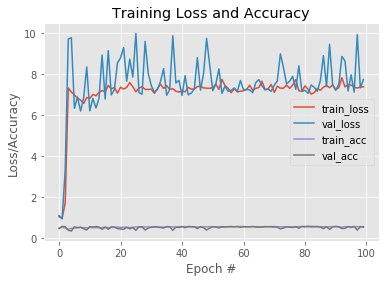

In [24]:

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()